<a href="https://colab.research.google.com/github/ilyasbrhm/Dataset/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Ilyas_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/ilyasbrhm/Dataset/refs/heads/main/Dataset%20Phone.csv" )

df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,16,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,16,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,16,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,32,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,32,420.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# 1. Memahami Struktur Data
num_rows, num_cols = df.shape
print(f"Dataset memiliki {num_rows} baris dan {num_cols} kolom.")
print(df.dtypes)

Dataset memiliki 1512 baris dan 12 kolom.
phone_name            object
brand                 object
os                    object
inches               float64
resolution            object
battery                int64
battery_type          object
ram(GB)                int64
announcement_date     object
weight(g)            float64
storage(GB)            int64
price(USD)           float64
dtype: object


In [ ]:
# 2. Menangani Data yang Hilang
print("Jumlah Data yang Hilang :\n", df.isnull().sum())

Jumlah Data yang Hilang :
 phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
price(USD)           0
dtype: int64


In [ ]:
# 3. Statistik deskriptif untuk data numerik
print(df.describe())

# Analisis Korelasi
correlation_matrix = df[['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)', 'price(USD)']].corr()
print("Matriks Korelasi:")
print(correlation_matrix)

            inches      battery      ram(GB)    weight(g)  storage(GB)  \
count  1512.000000  1512.000000  1512.000000  1512.000000  1512.000000   
mean      6.422460  4389.798942     6.683862   187.636243   109.164683   
std       0.477043   784.607022     2.701433    26.200115    74.436484   
min       3.800000  1821.000000     1.000000   130.000000     1.000000   
25%       6.300000  4000.000000     4.000000   175.000000    64.000000   
50%       6.500000  4500.000000     8.000000   187.000000   128.000000   
75%       6.670000  5000.000000     8.000000   197.250000   128.000000   
max      10.400000  7250.000000    24.000000   500.000000   512.000000   

        price(USD)  
count  1512.000000  
mean    337.847036  
std     266.740821  
min      40.000000  
25%     179.997500  
50%     260.000000  
75%     400.000000  
max    2300.000000  
Matriks Korelasi:
               inches   battery   ram(GB)  weight(g)  storage(GB)  price(USD)
inches       1.000000  0.673548  0.533778   0.77

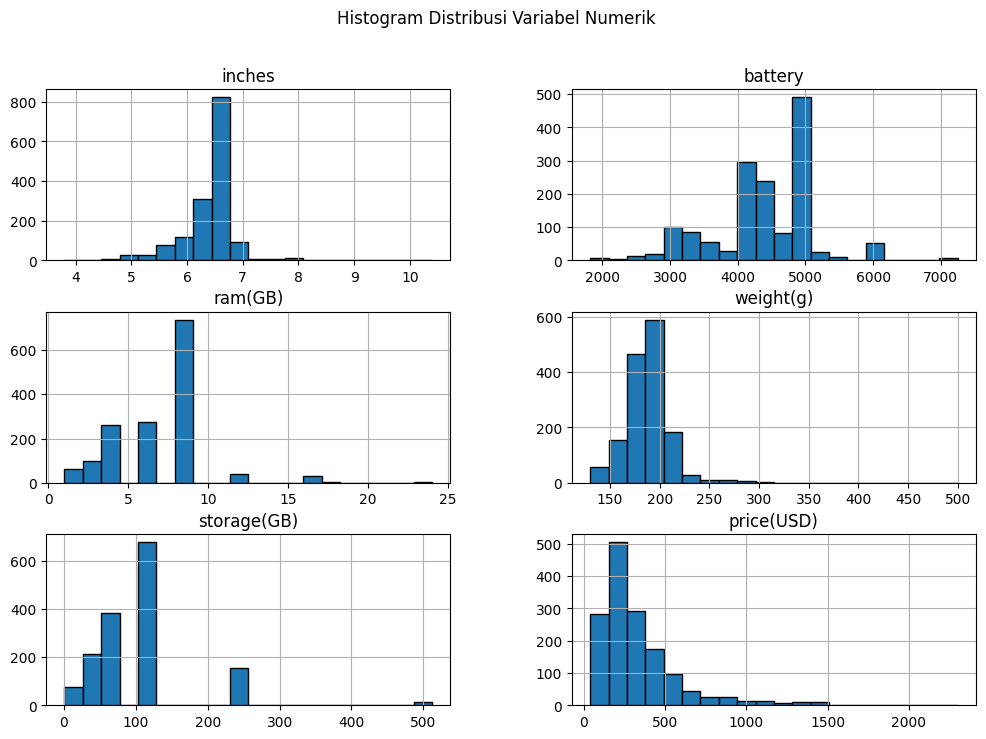

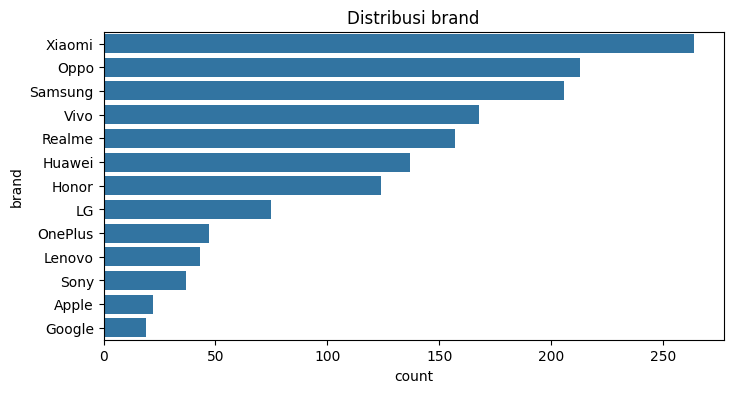

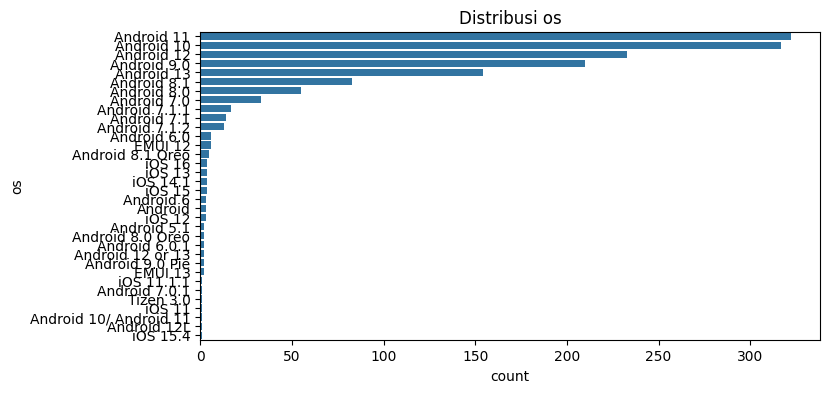

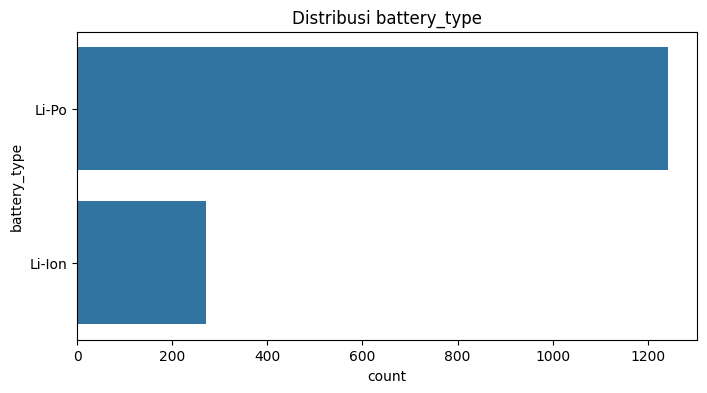

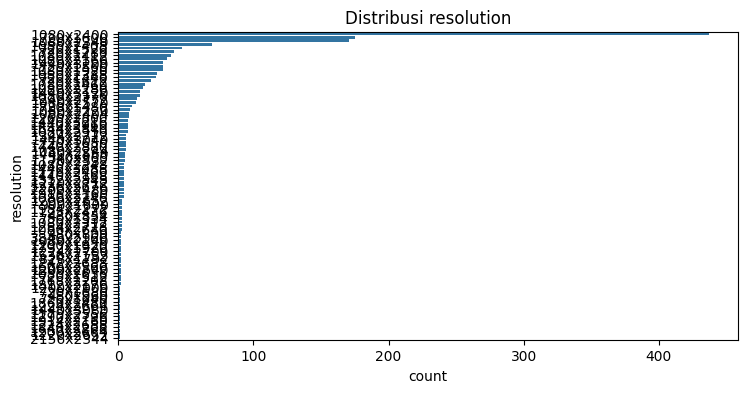

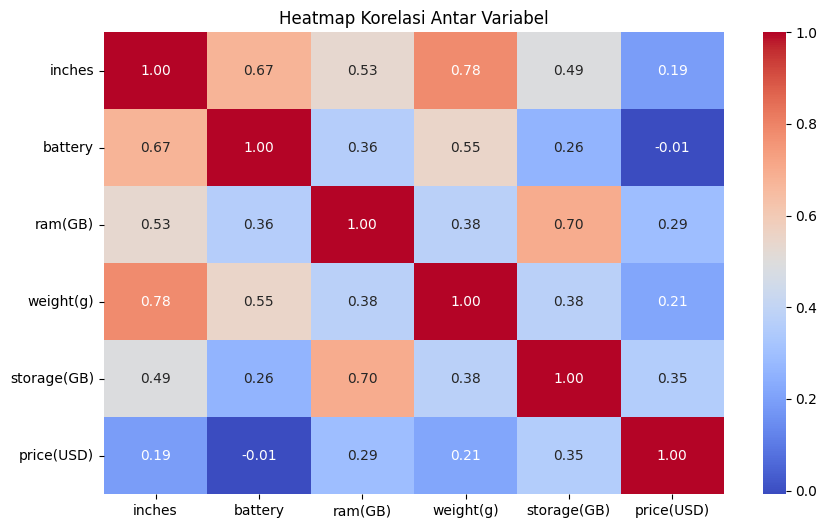

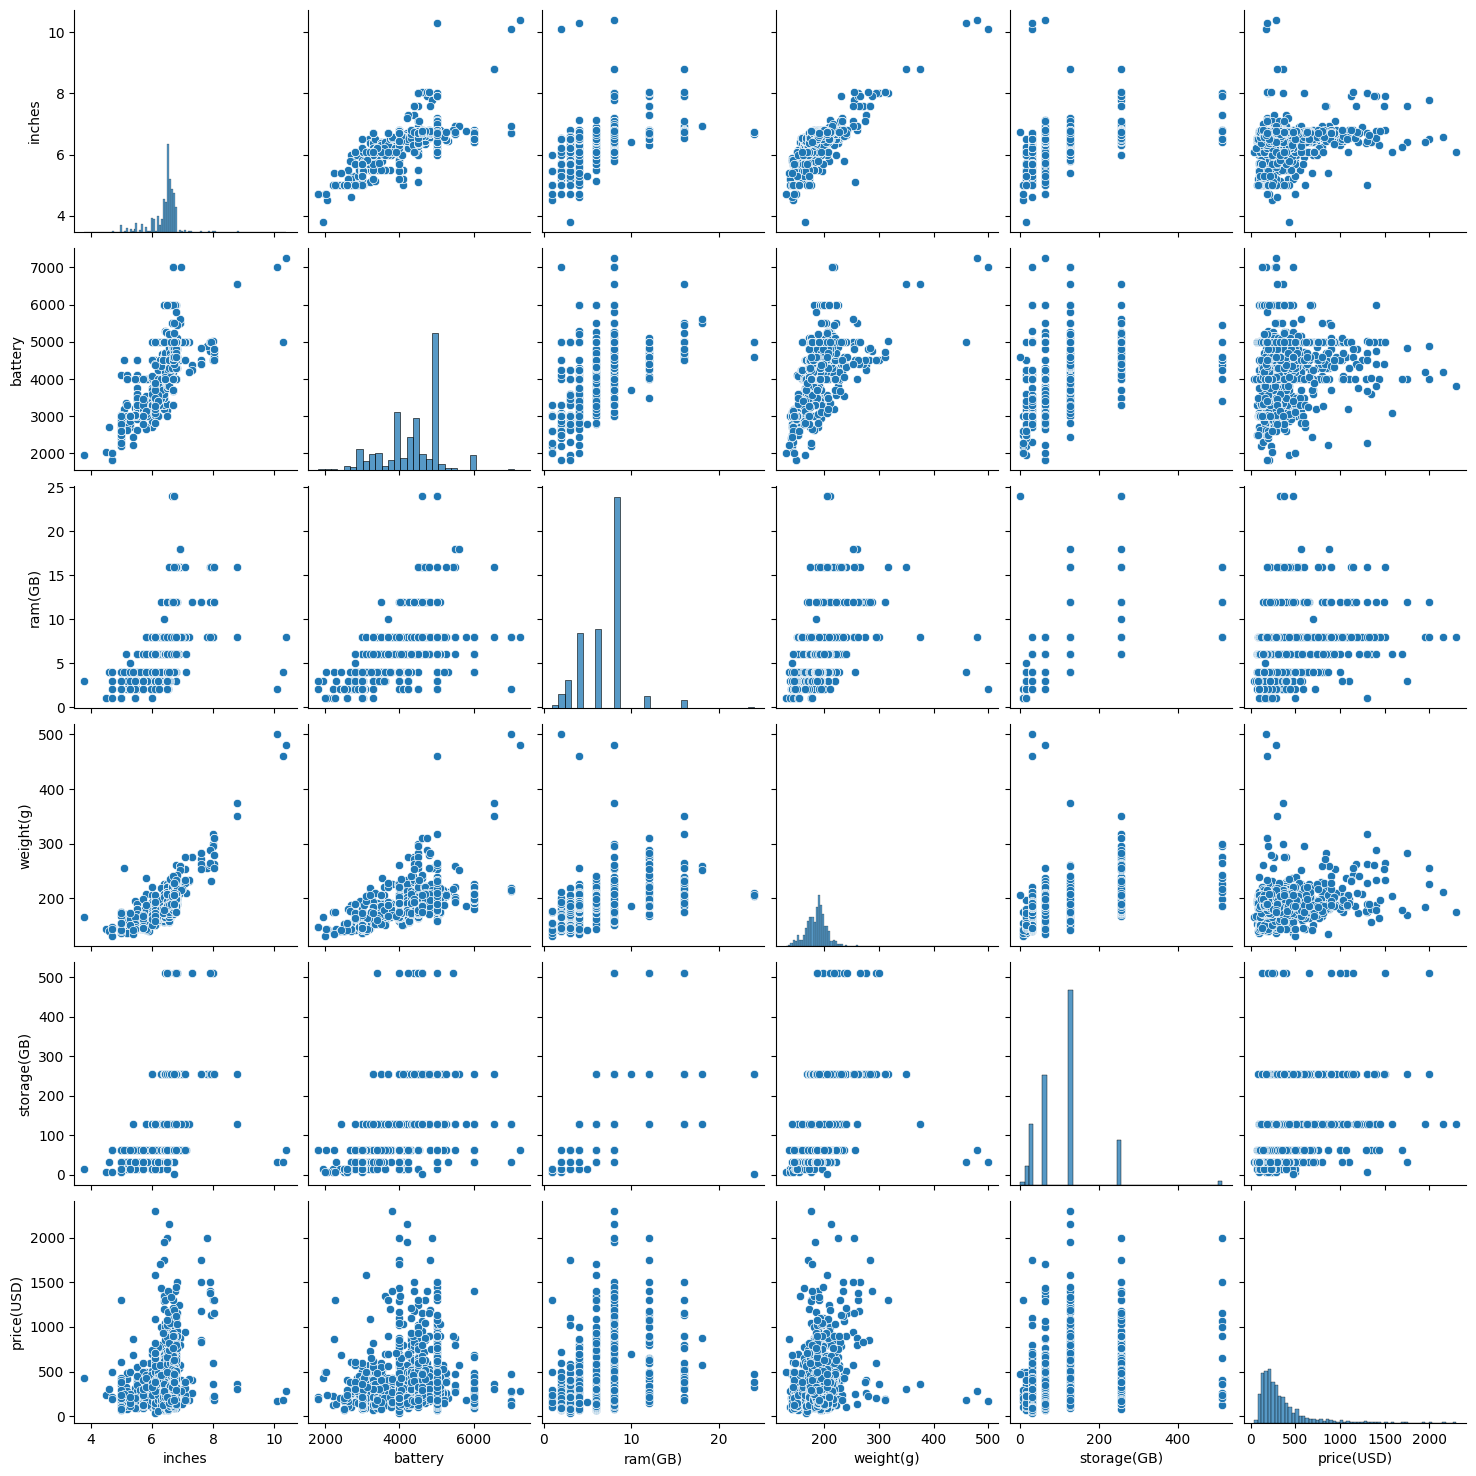

In [ ]:
# 4. Visualisasi Data
numerical_cols = ['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)', 'price(USD)']
df[numerical_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

## Visualisasi data kategorikal
categorical_cols = ['brand', 'os', 'battery_type', 'resolution']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.show()

## Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

## Scatter plot untuk beberapa variabel
sns.pairplot(df[numerical_cols])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
## Menghapus nilai kosong
df = df.dropna()

In [ ]:
## Menghapus duplikasi
df = df.drop_duplicates()

In [ ]:
## Normalisasi fitur numerik
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [ ]:
brand_encoder = LabelEncoder()
df['brand_encoded'] = brand_encoder.fit_transform(df['brand'])

os_encoder = LabelEncoder()
df['os_encoded'] = os_encoder.fit_transform(df['os'])

# Simpan mapping hasil encoding
brand_mapping = dict(zip(brand_encoder.classes_, brand_encoder.transform(brand_encoder.classes_)))
os_mapping = dict(zip(os_encoder.classes_, os_encoder.transform(os_encoder.classes_)))


In [ ]:
## Binning (Pengelompokan Data)
bins = [0, 200, 500, 1000, 2000, df['price(USD)'].max()]
labels = ['Low', 'Mid', 'High', 'Premium', 'Ultra']

df['price_category'] = pd.cut(df['price(USD)'], bins=bins, labels=labels)

print(df[['price(USD)', 'price_category']].head())

      price(USD) price_category
0   32336.158892          Ultra
1   27003.106916          Ultra
2  112331.938531          Ultra
3   40335.736856          Ultra
4  112331.938531          Ultra


In [ ]:
print(df.info())  # Cek apakah semua kolom ada
print(df.head())  # Lihat hasil transformasi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   phone_name         1512 non-null   object  
 1   brand              1512 non-null   object  
 2   os                 1512 non-null   object  
 3   inches             1512 non-null   float64 
 4   resolution         1512 non-null   object  
 5   battery            1512 non-null   float64 
 6   battery_type       1512 non-null   object  
 7   ram(GB)            1512 non-null   float64 
 8   announcement_date  1512 non-null   object  
 9   weight(g)          1512 non-null   float64 
 10  storage(GB)        1512 non-null   float64 
 11  price(USD)         1512 non-null   float64 
 12  brand_encoded      1512 non-null   int64   
 13  os_encoded         1512 non-null   int64   
 14  price_category     1512 non-null   category
 15  cluster            1512 non-null   int32   
 16  pca1  

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Pilih fitur numerik yang akan digunakan untuk clustering
features = ['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)', 'price(USD)']

# Tangani missing values (jika ada)
df[features] = df[features].fillna(df[features].median())

# Standarisasi fitur agar memiliki skala yang sama
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Inisialisasi model KMeans dengan n_init untuk menghindari warning
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Tampilkan jumlah data dalam setiap cluster
print(df['cluster'].value_counts())

cluster
1    1005
2     319
0     188
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

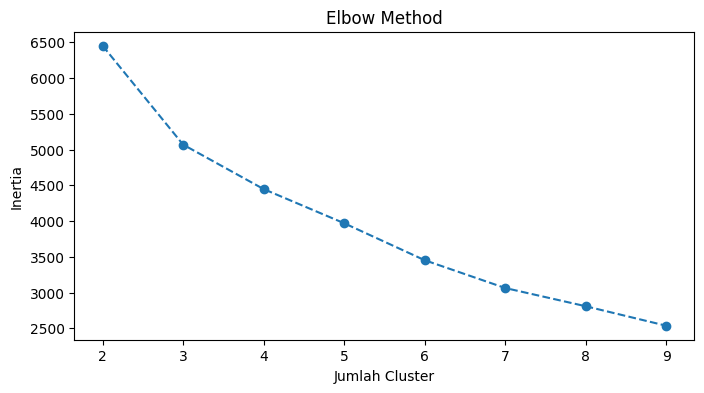

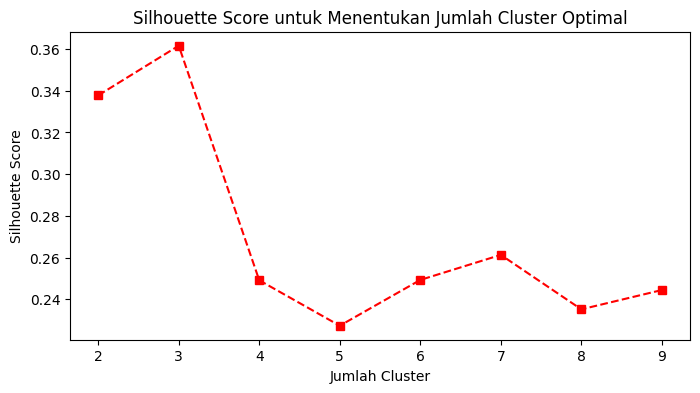

In [ ]:
# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Uji jumlah cluster dari 2 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

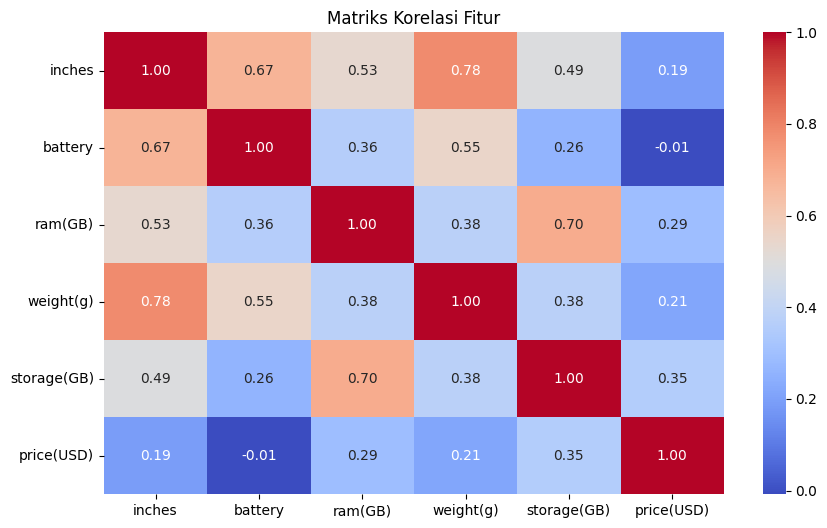

In [ ]:
# Cek korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

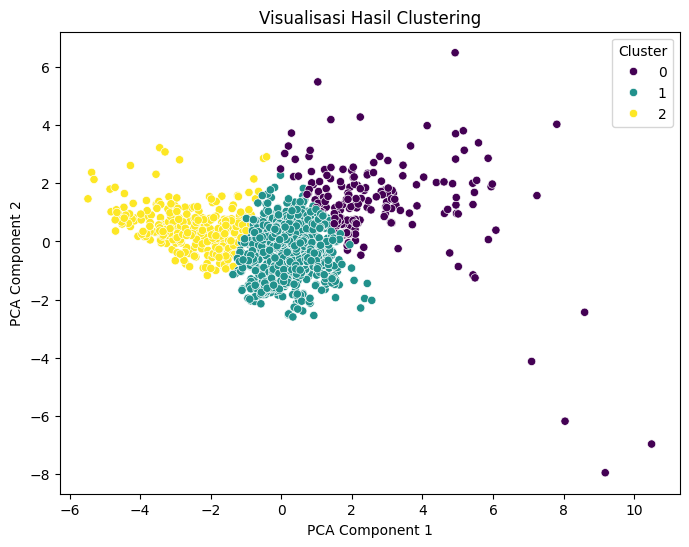

In [ ]:
# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Buat DataFrame hasil PCA
df['pca1'] = df_pca[:, 0]
df['pca2'] = df_pca[:, 1]

# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue=df['cluster'], palette='viridis', data=df)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Hasil Clustering')
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Pastikan label encoder mencakup semua kategori yang ada
all_brands = df['brand'].unique()  # Ambil semua kategori brand
all_os = df['os'].unique()  # Ambil semua kategori OS

brand_encoder.fit(all_brands)  # Fit ulang encoder
os_encoder.fit(all_os)

# Sekarang lakukan inverse transform
df['brand_original'] = brand_encoder.inverse_transform(df['brand_encoded'].astype(int))
df['os_original'] = os_encoder.inverse_transform(df['os_encoded'].astype(int))



### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Buat agregasi berdasarkan cluster
agg_funcs = {
    'inches': ['mean', 'min', 'max'],
    'battery': ['mean', 'min', 'max'],
    'ram(GB)': ['mean', 'min', 'max'],
    'weight(g)': ['mean', 'min', 'max'],
    'storage(GB)': ['mean', 'min', 'max'],
    'price(USD)': ['mean', 'min', 'max'],
    'brand_encoded': lambda x: x.mode()[0],  # Brand yang paling sering muncul
    'os_encoded': lambda x: x.mode()[0]      # OS yang paling sering muncul
}

# Buat summary berdasarkan cluster
cluster_summary = df.groupby('cluster').agg(agg_funcs).reset_index()

# Tampilkan hasil interpretasi
print("Interpretasi Hasil Clustering:")
for index, row in cluster_summary.iterrows():
    print(f"\nKlaster {row['cluster']} didapatkan karena:")
    print(f"- Ukuran layar rata-rata {row['inches']['mean']:.2f} inci, dengan min {row['inches']['min']:.2f} dan max {row['inches']['max']:.2f}.")
    print(f"- Kapasitas baterai rata-rata {row['battery']['mean']:.2f} mAh, dengan min {row['battery']['min']} dan max {row['battery']['max']}.")
    print(f"- RAM rata-rata {row['ram(GB)']['mean']:.2f} GB, dengan min {row['ram(GB)']['min']} dan max {row['ram(GB)']['max']}.")
    print(f"- Berat rata-rata {row['weight(g)']['mean']:.2f} gram, dengan min {row['weight(g)']['min']} dan max {row['weight(g)']['max']}.")
    print(f"- Penyimpanan rata-rata {row['storage(GB)']['mean']:.2f} GB, dengan min {row['storage(GB)']['min']} dan max {row['storage(GB)']['max']}.")
    print(f"- Harga rata-rata {row['price(USD)']['mean']:.2f} USD, dengan min {row['price(USD)']['min']} dan max {row['price(USD)']['max']}.")
    print(f"- Brand yang paling sering muncul dalam klaster ini adalah {row['brand_encoded']}.")
    print(f"- Sistem operasi yang paling sering muncul dalam klaster ini adalah {row['os_encoded']}.")


Interpretasi Hasil Clustering:

Klaster     0.0
Name: 0, dtype: float64 didapatkan karena:
- Ukuran layar rata-rata 9.71 inci, dengan min 9.33 dan max 11.38.
- Kapasitas baterai rata-rata 3651689.20 mAh, dengan min 2431945.3711202675 dan max 5690909.313737888.
- RAM rata-rata 34.58 GB, dengan min 12.084941652734809 dan max 71.49681306033094.
- Berat rata-rata 5873.69 gram, dengan min 4456.842489604078 dan max 13283.360925036044.
- Penyimpanan rata-rata 17512.44 GB, dengan min 183.5765475709993 dan max 38208.039578573866.
- Harga rata-rata 194438.46 USD, dengan min 35002.68487962882 dan max 613638.8242742022.
- Brand yang paling sering muncul dalam klaster ini adalah <lambda>    11.0
Name: 0, dtype: float64.
- Sistem operasi yang paling sering muncul dalam klaster ini adalah <lambda>    7.0
Name: 0, dtype: float64.

Klaster     1.0
Name: 1, dtype: float64 didapatkan karena:
- Ukuran layar rata-rata 9.54 inci, dengan min 8.85 dan max 9.86.
- Kapasitas baterai rata-rata 3680077.19 mAh, de

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.